# **Garbage Classification**

Dataset source: https://www.kaggle.com/asdasdasasdas/garbage-classification

In [51]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, 
     BatchNormalization, GlobalAveragePooling2D
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

Split the original dataset into train and test data.

In [2]:
original_dataset_dir = 'C:\\Users\\Se Jong Oh\\Desktop\\garbage_classification'

base_dir = 'C:\\Users\\Se Jong Oh\\Desktop\\garbage_sorting'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cardboard pictures
train_cardboard_dir = os.path.join(train_dir, 'cardboard')
os.mkdir(train_cardboard_dir)

# Directory with our training glass pictures
train_glass_dir = os.path.join(train_dir, 'glass')
os.mkdir(train_glass_dir)

# Directory with our training metal pictures
train_metal_dir = os.path.join(train_dir, 'metal')
os.mkdir(train_metal_dir)

# Directory with our training paper pictures
train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

# Directory with our training plastic pictures
train_plastic_dir = os.path.join(train_dir, 'plastic')
os.mkdir(train_plastic_dir)

# Directory with our training trash pictures
train_trash_dir = os.path.join(train_dir, 'trash')
os.mkdir(train_trash_dir)

# Directory with our test cardboard pictures
test_cardboard_dir = os.path.join(test_dir, 'cardboard')
os.mkdir(test_cardboard_dir)

# Directory with our test glass pictures
test_glass_dir = os.path.join(test_dir, 'glass')
os.mkdir(test_glass_dir)

# Directory with our test metal pictures
test_metal_dir = os.path.join(test_dir, 'metal')
os.mkdir(test_metal_dir)

# Directory with our test paper pictures
test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)

# Directory with our test plastic pictures
test_plastic_dir = os.path.join(test_dir, 'plastic')
os.mkdir(test_plastic_dir)

# Directory with our test trash pictures
test_trash_dir = os.path.join(test_dir, 'trash')
os.mkdir(test_trash_dir)

# Copy first 393 cardboard images to train_cardboard_dir
fnames = ['cardboard{}.jpg'.format(i) for i in range(1, 394)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cardboard_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 10 cardboard images to test_cardboard_dir
fnames = ['cardboard{}.jpg'.format(i) for i in range(394, 404)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cardboard_dir, fname)
    shutil.copyfile(src, dst)
    
    
# Copy first 491 glass images to train_glass_dir
fnames = ['glass{}.jpg'.format(i) for i in range(1, 492)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_glass_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 10 glass images to test_glass_dir
fnames = ['glass{}.jpg'.format(i) for i in range(492, 502)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_glass_dir, fname)
    shutil.copyfile(src, dst)
    
    
# Copy first 400 metal images to train_metal_dir
fnames = ['metal{}.jpg'.format(i) for i in range(1, 401)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_metal_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 10 metal images to test_metal_dir
fnames = ['metal{}.jpg'.format(i) for i in range(401, 411)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_metal_dir, fname)
    shutil.copyfile(src, dst)  
    
    
# Copy first 584 paper images to train_paper_dir
fnames = ['paper{}.jpg'.format(i) for i in range(1, 585)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_paper_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 10 paper images to test_paper_dir
fnames = ['paper{}.jpg'.format(i) for i in range(585, 595)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_paper_dir, fname)
    shutil.copyfile(src, dst)
    
    
# Copy first 472 plastic images to train_plastic_dir
fnames = ['plastic{}.jpg'.format(i) for i in range(1, 473)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_plastic_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 10 plastic images to test_plastic_dir
fnames = ['plastic{}.jpg'.format(i) for i in range(473, 483)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_plastic_dir, fname)
    shutil.copyfile(src, dst)
    
    
# Copy first 127 trash images to train_trash_dir
fnames = ['trash{}.jpg'.format(i) for i in range(1, 128)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_trash_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 10 trash images to test_trash_dir
fnames = ['trash{}.jpg'.format(i) for i in range(128, 138)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_trash_dir, fname)
    shutil.copyfile(src, dst)

We can see that the dataset has 6 subfolders.

In [52]:
os.listdir(os.path.join(os.getcwd(),train_dir))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

Let's view some images from the dataset.

In [53]:
data = os.path.join('C:\\Users\\Se Jong Oh\\Desktop\\Garbage classification')
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

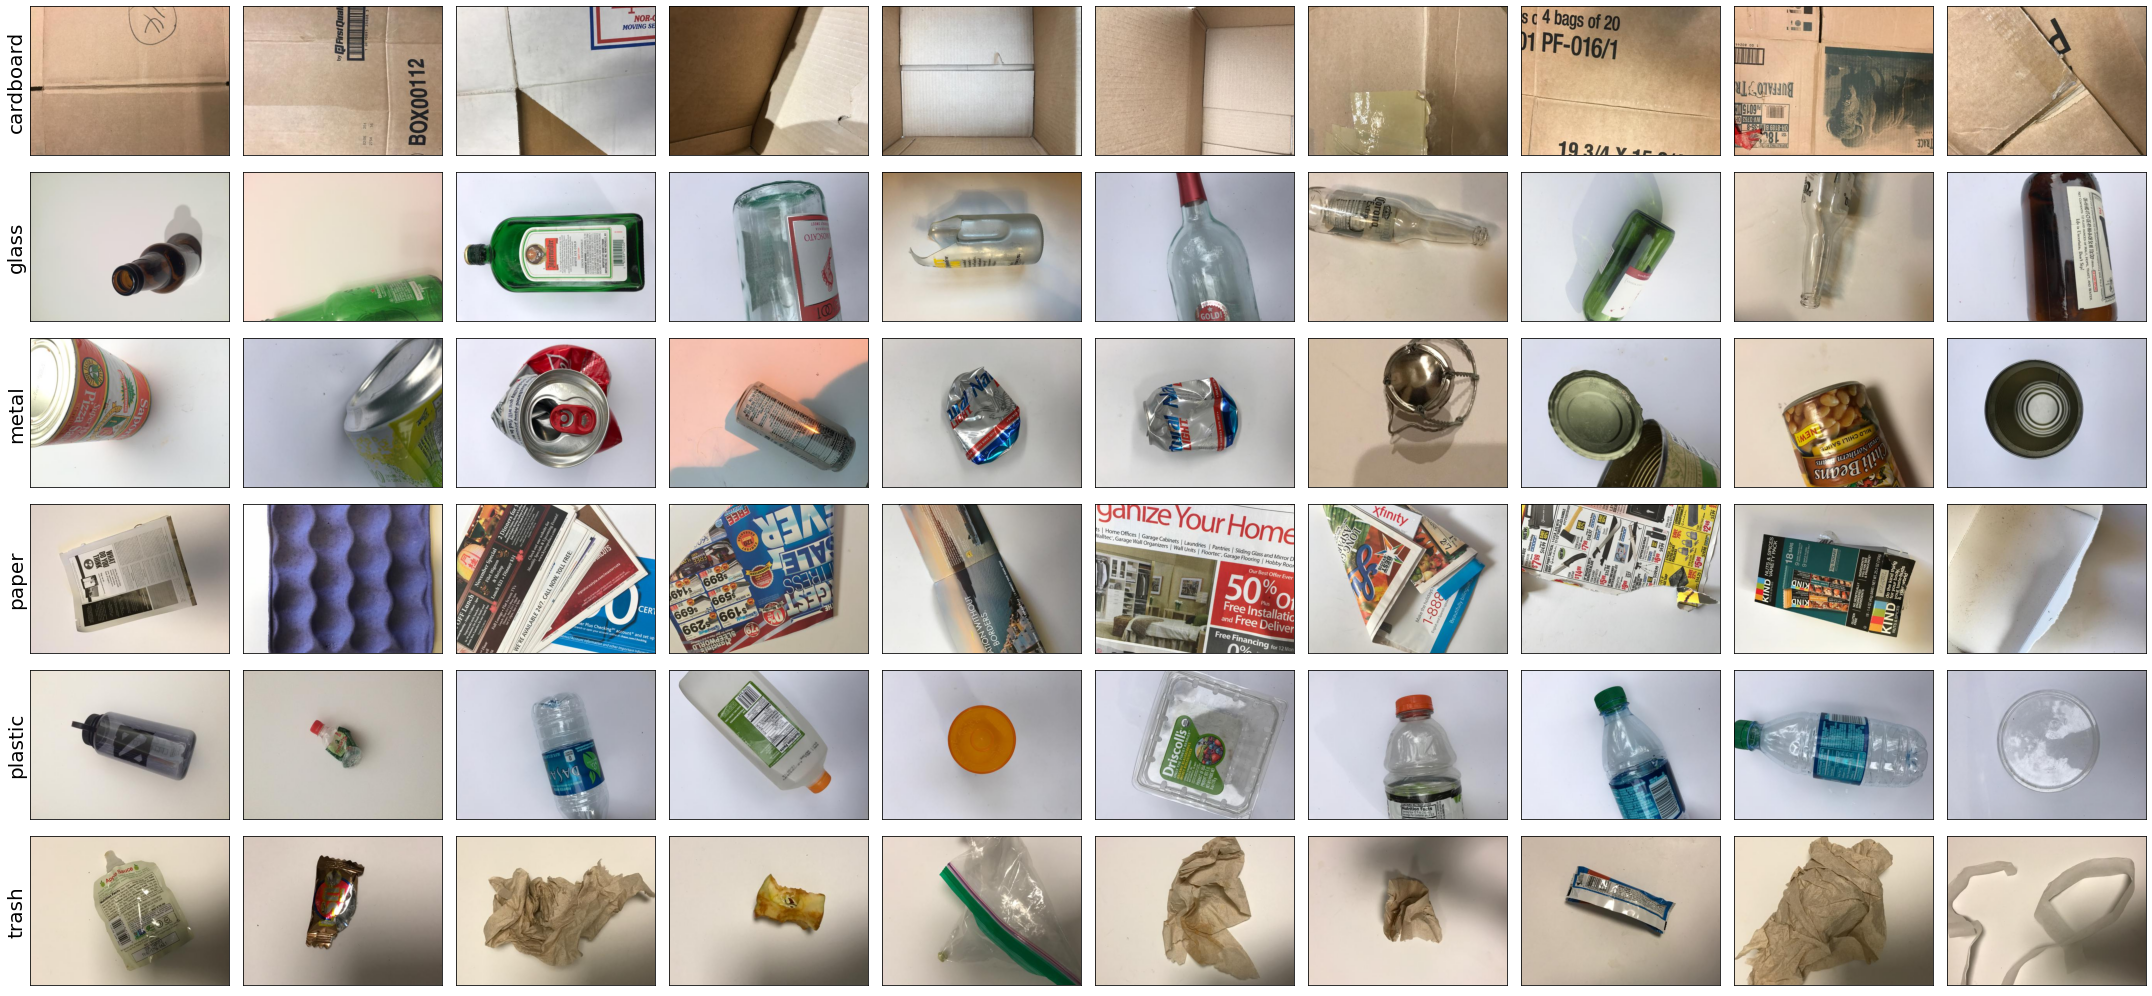

In [54]:
plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(data, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [57]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 393
Images of label "glass":	 491
Images of label "metal":	 400
Images of label "paper":	 584
Images of label "plastic":	 472
Images of label "trash":	 127


**Data Augmentation**

Since this is a small dataset, we don't have a lot of images to train on. Let's do image data augmentation to expand the training set so that we improve the performance of the model.

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=0.1,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        subset='validation')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2222 images belonging to 6 classes.
Found 245 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


**Building a Convolutional Neural Network**

In [11]:
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(238,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 238)       137326    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 238)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 77112)            

I have used categorical cross entropy as the loss function and used the Adam optimizer with learning rate of 0.0001.

In [12]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=test_generator.n//test_generator.batch_size
)

Epoch 1/100
111/111 [==============================] - 115s 1s/step - loss: 1.6927 - accuracy: 0.2684 - val_loss: 1.5735 - val_accuracy: 0.3667
Epoch 2/100
111/111 [==============================] - 114s 1s/step - loss: 1.5663 - accuracy: 0.3442 - val_loss: 1.5278 - val_accuracy: 0.4500
Epoch 3/100
111/111 [==============================] - 128s 1s/step - loss: 1.4905 - accuracy: 0.3965 - val_loss: 1.4110 - val_accuracy: 0.4667
Epoch 4/100
111/111 [==============================] - 114s 1s/step - loss: 1.4434 - accuracy: 0.4169 - val_loss: 1.4517 - val_accuracy: 0.3500
Epoch 5/100
111/111 [==============================] - 117s 1s/step - loss: 1.3983 - accuracy: 0.4423 - val_loss: 1.2526 - val_accuracy: 0.5167
Epoch 6/100
111/111 [==============================] - 111s 993ms/step - loss: 1.3809 - accuracy: 0.4600 - val_loss: 1.5168 - val_accuracy: 0.3167
Epoch 7/100
111/111 [==============================] - 97s 876ms/step - loss: 1.3474 - accuracy: 0.4596 - val_loss: 1.2769 - val_accu

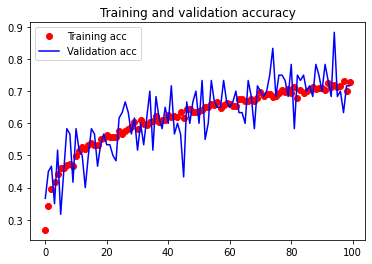

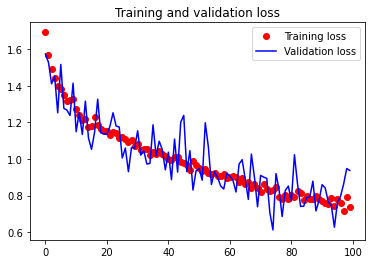

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
model.evaluate(test_generator)

13/13 [==============================] - 4s 262ms/step - loss: 0.8061 - accuracy: 0.7020


[0.8061235547065735, 0.7020407915115356]

After training with 100 epochs, 111 steps per epoch and 3 validation steps, my CNN model got a validation accuracy of 70.2%. 

**Using a pre-trained model VGG16**

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=0.1,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        subset='validation')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2222 images belonging to 6 classes.
Found 245 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


Import the VGG16 model with the ImageNet dataset as weights. Put include_top=False as this allows a new output layer to be added and trained.

In [20]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [26]:
model2 = Sequential()

conv_base.trainable=False
model2.add(conv_base)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(units=512, activation='relu'))  
model2.add(BatchNormalization())                 
model2.add(Dropout(0.2))
model2.add(Dense(units=128, activation='relu')) 
model2.add(BatchNormalization())                
model2.add(Dropout(0.2))      
model2.add(Dense(units=6, activation='softmax'))

I have used categorical cross entropy as the loss function and used the Adam optimizer with learning rate of 0.0001.

In [27]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [30]:
history_vgg = model2.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=test_generator.n//test_generator.batch_size)

Epoch 1/100
111/111 [==============================] - 283s 3s/step - loss: 1.7493 - accuracy: 0.3783 - val_loss: 1.5121 - val_accuracy: 0.4333
Epoch 2/100
111/111 [==============================] - 283s 3s/step - loss: 1.3829 - accuracy: 0.5018 - val_loss: 1.3051 - val_accuracy: 0.5500
Epoch 3/100
111/111 [==============================] - 283s 3s/step - loss: 1.2299 - accuracy: 0.5568 - val_loss: 0.8856 - val_accuracy: 0.7167
Epoch 4/100
111/111 [==============================] - 277s 2s/step - loss: 1.1183 - accuracy: 0.5976 - val_loss: 1.0288 - val_accuracy: 0.6000
Epoch 5/100
111/111 [==============================] - 292s 3s/step - loss: 1.0399 - accuracy: 0.6217 - val_loss: 0.8127 - val_accuracy: 0.7000
Epoch 6/100
111/111 [==============================] - 283s 3s/step - loss: 0.9978 - accuracy: 0.6408 - val_loss: 0.7587 - val_accuracy: 0.6500
Epoch 7/100
111/111 [==============================] - 260s 2s/step - loss: 0.9428 - accuracy: 0.6449 - val_loss: 0.8194 - val_accuracy:

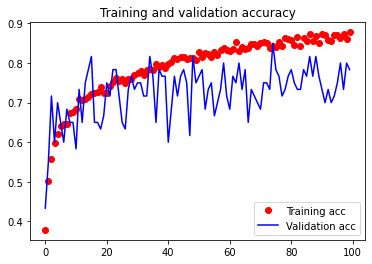

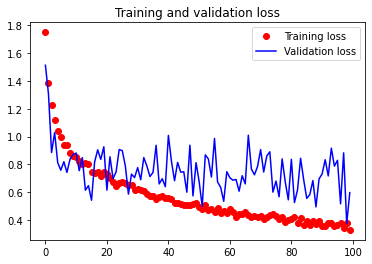

In [31]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
model2.evaluate(test_generator)

13/13 [==============================] - 28s 2s/step - loss: 0.6643 - accuracy: 0.7714


[0.6642829775810242, 0.7714285850524902]

By performing transfer learning with VGG16, I was able to get a validation accuracy of 77.14%.

Now let's visualize the results by testing out how well the model does in garbage classification prediction.

In [46]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


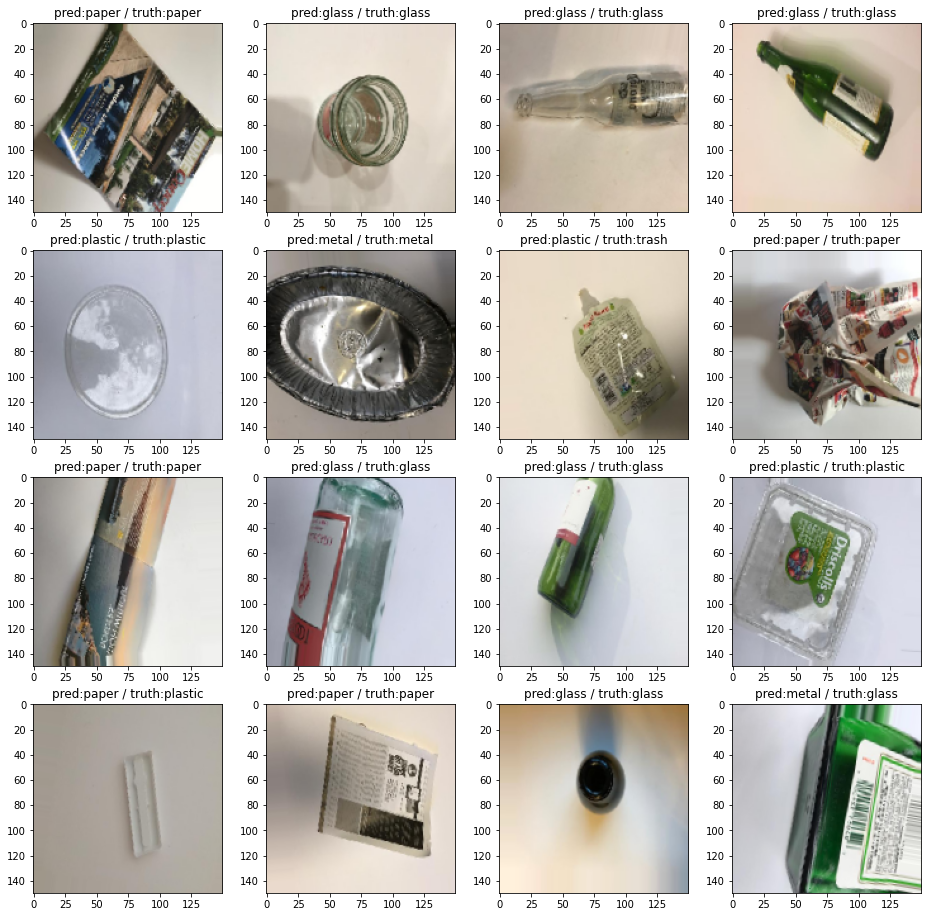

In [47]:
test_x, test_y = test_generator.__getitem__(1)

preds = model2.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])